In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#defining the features
features = ["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm", "petal_width_in_cm", "target_class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features) #reading the dataset


In [4]:

df.head()


,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
#Describing dataset
df.describe

<bound method NDFrame.describe of      sepal_length_in_cm  sepal_width_in_cm  petal_length_in_cm   
0                   5.1                3.5                 1.4  \
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal_width_in_cm    target_class  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   target_class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


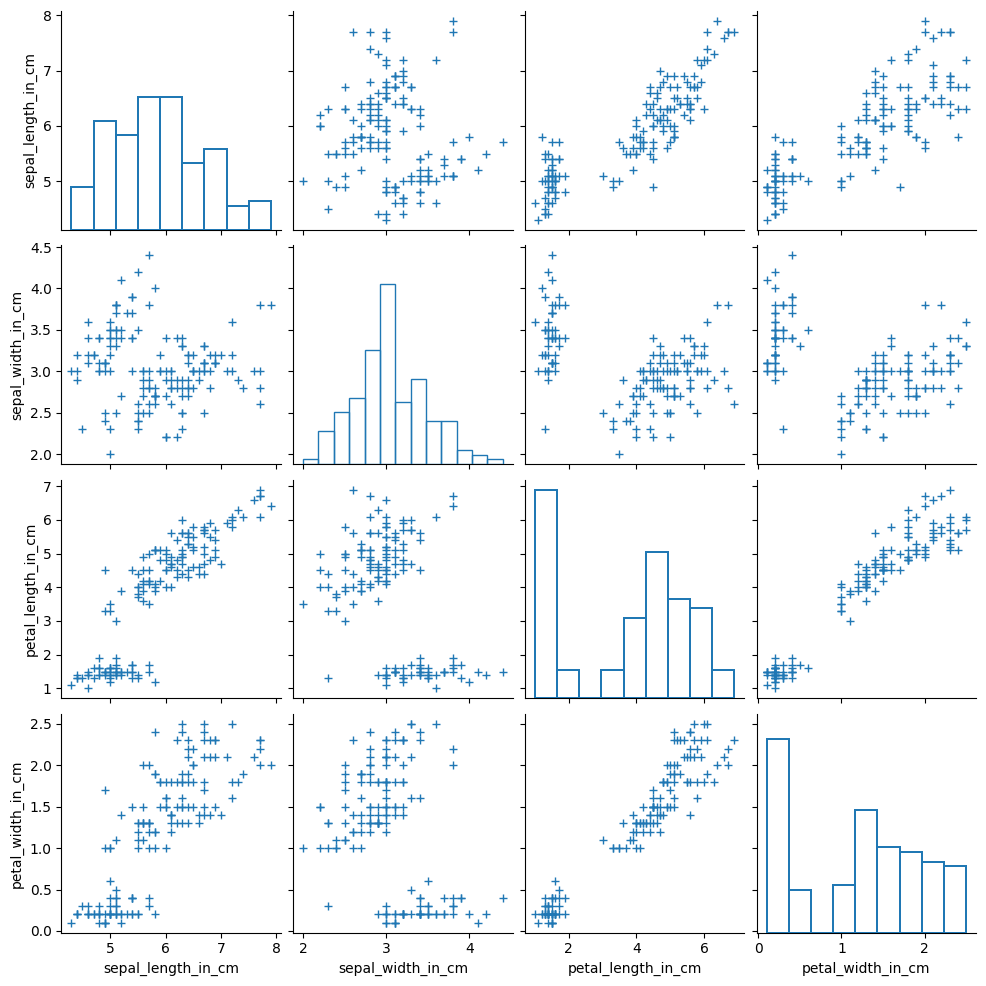

In [9]:
#Pairplot
sns.pairplot(
    df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [10]:
TargetClass = {}
TargetClass["Iris-setosa"] = (df["target_class"] == 'Iris-setosa').sum()
TargetClass["Iris-versicolor"] = (df["target_class"] == 'Iris-versicolor').sum()
TargetClass["Iris-virginica"] = (df["target_class"] == 'Iris-virginica').sum()

print(TargetClass)

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


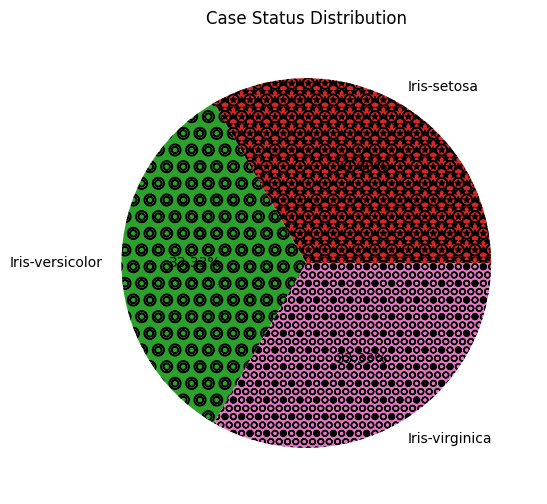

In [11]:
labels = []
count = []
colors = ['tab:red', 'tab:green', 'tab:pink'] # list of colors to use

for x, y in TargetClass.items():
    labels.append(x)
    count.append(y)
    
plt.figure(figsize = (6, 6))
plt.pie(count, labels=labels, colors=colors, hatch=['**O', 'oO', 'O.O', '.||.'] ,autopct='%1.2f%%')
plt.title('Case Status Distribution')
plt.show()

In [12]:
X = df.drop('target_class', axis = 1)
Y = df['target_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )
Y_train.value_counts()

target_class
Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: count, dtype: int64

In [13]:
# Logistic Regression Model
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

In [14]:
#Spilting dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )


In [15]:
#Fitting the model
X = df.drop('target_class', axis = 1)
Y = df['target_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

In [16]:
#accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy*100,'%')

96.66666666666667 %


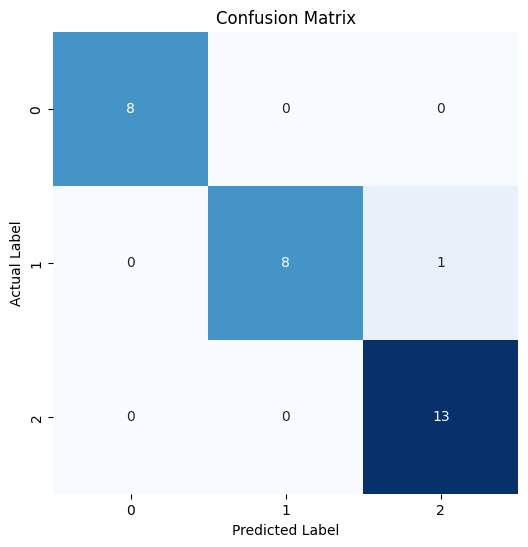

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap with annotations
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, ax=ax)

# Set the axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()

In [18]:
#Classification Report
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

